In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

cookiecats_df = pd.read_csv('data/cookie_cats.csv')
zscore3 = cookiecats_df[['sum_gamerounds']].loc[zscore(cookiecats_df['sum_gamerounds']) > 3]
cookiecats_df.drop(index=list(zscore3.index), inplace=True)
cookiecats_df['sum_gamerounds_log'] = cookiecats_df['sum_gamerounds'].apply(np.log)
cookiecats_nonzero = cookiecats_df.loc[cookiecats_df['sum_gamerounds'] != 0]

So we are going to use a bootstrapping a/b test to determine the level of sureness that we can have in deciding that it is not worth moving our waiting gate to level 40.

We need to use the mean for our test statistics, since the median would not be very interesting since it is just 1 or 0.

In [6]:
day1_30means = []
day1_40means = []
day7_30means = []
day7_40means = []

for i in range(5000):
    group_sample = cookiecats_nonzero.sample(frac=1, replace=True).groupby('version')
    day1_means = group_sample['retention_1'].agg('mean')
    day7_means = group_sample['retention_7'].agg('mean')
    day1_30means.append(day1_means['gate_30'])
    day1_40means.append(day1_means['gate_40'])
    day7_30means.append(day7_means['gate_30'])
    day7_40means.append(day7_means['gate_40'])
    
day1_30df = pd.DataFrame(day1_30means, columns=['gate_30'])
day1_40df = pd.DataFrame(day1_40means, columns=['gate_40'])
day7_30df = pd.DataFrame(day7_30means, columns=['gate_30'])
day7_40df = pd.DataFrame(day7_40means, columns=['gate_40'])

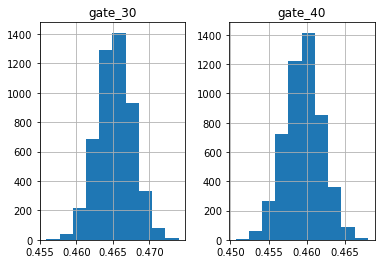

In [15]:
day1_df = day1_30df.merge(day1_40df, left_index=True, right_index=True)
day1_df.hist();

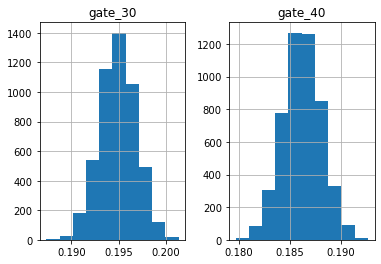

In [16]:
day7_df = day7_30df.merge(day7_40df, left_index=True, right_index=True)
day7_df.hist();

In [28]:
day1_df['difference'] = (100*(day1_df['gate_30'] - day1_df['gate_40']) / day1_df['gate_40'])

In [33]:
(day1_df['difference'] < 1.3947441989285352).sum()/len(day1_df)

0.5786

In [30]:
day7_df['difference'] = (100*(day7_df['gate_30'] - day7_df['gate_40']) / day7_df['gate_40'] * 100)

In [32]:
(day7_df['difference'] < 4.794915198223265).sum()/len(day7_df)

0.001